## ANLP Assignment 2: Natural Language Generation Code
### Christopher Hamilton,  a1766121

In [1]:
import json
import os

import pandas as pd
import numpy as np

### 1. Reading dataset and initial pre-processing

In [2]:
def read_json_to_df(file_name):
    data = []
    with open(file_name) as data_file:
        for line in data_file:
            # Load each line of the JSON file as a dictionary
            data.append(json.loads(line))

    # Form a Pandas DataFrame from the dictionaries
    return pd.json_normalize(data)

# Load the training and test data
raw_train_df = read_json_to_df("hotel_reviews_train.json")
raw_test_df = read_json_to_df("hotel_reviews_test.json")

In [3]:
# Print out the initially loaded dataframes
raw_train_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_reviews,author.id,author.location,author.num_cities,author.num_helpful_votes,author.num_type_reviews,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“Horrible experience”,First of all we got there and they didn't have...,September 2012,80138,0,"September 19, 2012",140716137,False,1.0,2.0,...,1.0,Kh3RD,1.0,AB404BB664D653ECF79DE0E0867F6D34,"Las Vegas, Nevada",NaN,NaN,NaN,NaN,NaN
1,“Stay Away”,Found Racist graffiti in the room. Request to ...,June 2011,240151,1,"June 27, 2011",114807323,False,1.0,1.0,...,NaN,TheUglyPhotographer,4.0,BB116F87FE8F9AB356F63853BFD32FFE,"Oceanside, California",3.0,4.0,4.0,NaN,NaN
2,“Great location and service”,Close to Union Square - hotel is a bit of a ma...,October 2010,80793,0,"October 25, 2010",84805430,False,4.0,5.0,...,4.0,Moonstonemoclips,48.0,F3D0CF371B788300E73A1413B2DABB4B,Kirkland,31.0,27.0,32.0,NaN,NaN
3,“I will never go back here again!”,I had a bad vibe about this place from the mom...,June 2012,111418,1,"June 28, 2012",132971117,False,3.0,2.0,...,1.0,JoanellenJ,22.0,BC6BC07F81B768F78B6CE17A18762C11,New York,10.0,9.0,5.0,NaN,NaN
4,“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...",January 2012,671150,3,"February 4, 2012",124104157,False,NaN,NaN,...,NaN,Lynnworks,3.0,F7E9D044FA2554FD06A871289312E043,Providence,3.0,7.0,3.0,NaN,NaN


In [4]:
raw_test_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_cities,author.num_helpful_votes,author.num_reviews,author.num_type_reviews,author.id,author.location,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“I was SO surprised! I WILL return!”,My husband and I just celebrated our 25th wedd...,November 2011,1783324,1,"November 26, 2011",121063682,False,5.0,5.0,...,5.0,shooflyfarm,15.0,12.0,30.0,11.0,02C39D355EE31BFA82F2724523782A92,"Opelika, Alabama",NaN,NaN
1,“A Mother/Daughter vacation”,I could not leave a bad comment on any part of...,August 2011,88458,0,"August 10, 2011",116545869,False,5.0,5.0,...,NaN,bestmpm,NaN,NaN,1.0,NaN,8F37B44FE89FD626313A7CB4B381FE40,Chattanooga,NaN,NaN
2,“Good Choice for Pre-cruise”,I spent one night at this hotel prior to a cru...,November 2010,82868,0,"December 6, 2010",89196759,False,5.0,5.0,...,5.0,Conner2dood,20.0,39.0,26.0,24.0,5E57B2B21C69F07E617D67C748DF010A,Pennsylvania,NaN,NaN
3,“Unsung Hero”,"For the past year and a half, my daughter has ...",July 2011,98979,0,"July 28, 2011",115879719,False,5.0,5.0,...,NaN,LeviK,2.0,NaN,2.0,NaN,D7E5C22B3A877DEA1434B18E797FEE19,,NaN,NaN
4,"“Great Value for a King, Queen, and Princesses.”","Great Value for a King, Queen, and Princesses....",March 2007,112273,8,"March 21, 2007",7198417,False,5.0,5.0,...,5.0,thomrho,13.0,25.0,27.0,4.0,EEE6C615C8EBCA4AFD2774810E590274,"albuquerque, nm",5.0,5.0


In [5]:
ratings_columns = [col for col in raw_train_df.columns if col.startswith("ratings.")]

# Select the title, text and overall rating columns to make a new dataframe
train_df = raw_train_df[["title", "text"] + ratings_columns]
test_df = raw_test_df[["title", "text"] + ratings_columns]

# Check the value counts for the ratings
for dataset in [train_df, test_df]:
    for column in ratings_columns:
        print(dataset[column].value_counts())
        print()

    print()

ratings.service
5.0    11130
4.0     5289
3.0     2677
1.0     1341
2.0     1113
Name: count, dtype: int64

ratings.cleanliness
5.0    11814
4.0     5560
3.0     2373
2.0      901
1.0      897
Name: count, dtype: int64

ratings.overall
5.0    9825
4.0    7720
3.0    3287
2.0    1611
1.0    1557
Name: count, dtype: int64

ratings.value
5.0    8828
4.0    6312
3.0    3603
2.0    1420
1.0    1384
Name: count, dtype: int64

ratings.location
5.0    11743
4.0     4523
3.0     1875
2.0      504
1.0      338
Name: count, dtype: int64

ratings.sleep_quality
5.0    7167
4.0    3898
3.0    1811
1.0     671
2.0     638
Name: count, dtype: int64

ratings.rooms
5.0    8116
4.0    6142
3.0    3330
2.0    1316
1.0    1096
Name: count, dtype: int64

ratings.check_in_front_desk
5.0    1323
4.0     694
3.0     486
2.0     221
1.0     185
Name: count, dtype: int64

ratings.business_service_(e_g_internet_access)
5.0    643
3.0    503
4.0    491
2.0    164
1.0    158
Name: count, dtype: int64


ratings.serv

In [6]:
# Find indices of rows where the rating is 0
zero_rating_indices = test_df[test_df['ratings.overall'] == 0].index
for index in zero_rating_indices:
    # Print the text corresponding to the zero rating
    print(test_df['text'][index])

Best location. Right where Pier 39 is. Lots of things to do around the area, restaurants and sight seeing. Staff are friendly. Great service. Will come back again :)


In [7]:
# Based on the above text, it is unlikely the reviewer meant to give a low rating
# Instead, we will remvoe the 0 from the dataset
test_df = test_df.drop(zero_rating_indices)

In [8]:
# Check the value counts for the ratings after the 0 rating has been removed
print("Test data ratings")
print(test_df["ratings.overall"].value_counts())

Test data ratings
ratings.overall
5.0    2468
4.0    1933
3.0     793
2.0     420
1.0     385
Name: count, dtype: int64


Python's lambda functions can be used to remove the special characters from the dataset. Pandas DataFrames columns include an `apply` method that can take in a lambda function to apply to each cell in the column. By including a lambda function that will only include characters which are alphanumeric or spaces, the special characters can be removed from the dataset (Saturn Cloud 2024).

At the same time, we can apply the `lower()` function on each character to convert all the text to lowercase. This can be seen by viewing the first few rows with the `head()` function on the DataFrames.

In [9]:
# Remove remove non-alphanumeric characters from the title and text columns
train_df.loc[:, 'title'] = train_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
train_df.loc[:, 'text'] = train_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

test_df.loc[:, 'title'] = test_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
test_df.loc[:, 'text'] = test_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

In [10]:
train_df.head()

,title,text,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,horrible experience,first of all we got there and they didnt have ...,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN,NaN
1,stay away,found racist graffiti in the room request to c...,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
2,great location and service,close to union square hotel is a bit of a maz...,4.0,5.0,4.0,3.0,5.0,4.0,4.0,NaN,NaN
3,i will never go back here again,i had a bad vibe about this place from the mom...,3.0,2.0,2.0,1.0,4.0,1.0,1.0,NaN,NaN
4,ripped off our visa card after departure,after we received our final bill and left the ...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test_df.head()

,title,text,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,i was so surprised i will return,my husband and i just celebrated our 25th wedd...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,a motherdaughter vacation,i could not leave a bad comment on any part of...,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
2,good choice for precruise,i spent one night at this hotel prior to a cru...,5.0,5.0,4.0,5.0,4.0,5.0,5.0,NaN,NaN
3,unsung hero,for the past year and a half my daughter has b...,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
4,great value for a king queen and princesses,great value for a king queen and princesses we...,5.0,5.0,5.0,5.0,4.0,NaN,5.0,5.0,5.0


The provided code for the `language_filter.py` file includes an example of using the `langdetect` Python package to filter for only English text. Rather than applying the filter for only English reviews when reading the file, we can apply the filter on the loaded DataFrames using a similar method to above. By using the Pandas `apply` method on the text and title columns, the returned DataFrame will only include rows where both the title and text are in English as determined by the `langdetect` package.

In [12]:
from langdetect import detect as detect_language

def filter_english_reviews(df):
    def is_english(text):
        try:
            return detect_language(text) == "en"
        except:
            return False

    # Filter the DataFrame for reviews where both title and text are in English
    return df[df['text'].apply(is_english) & df['title'].apply(is_english)]

Since the language detecting process takes some time over the whole dataset, to save time during development, the filtered DataFrames can be saved and loaded from CSV. Since these DataFrames will not change, and all preprocessing steps are the same, running the language filter each time is not necessary. I have written some quick checks to see if the files have already been saved, and if they have load them, otherwise run the language check code and save the files for later.

In [13]:
# Save the English reviews to a CSV file to save time filtering when running again (NumFOCUS, Inc. 2024)
if os.path.exists("english_hotel_reviews_train.csv"):
    train_df = pd.read_csv("english_hotel_reviews_train.csv")
else:
    train_df = filter_english_reviews(train_df)
    train_df.to_csv("english_hotel_reviews_train.csv", index=False)

if os.path.exists("english_hotel_reviews_test.csv"):
    test_df = pd.read_csv("english_hotel_reviews_test.csv")
else:
    test_df = filter_english_reviews(test_df)
    test_df.to_csv("english_hotel_reviews_test.csv", index=False)

In [14]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18112 entries, 0 to 18111
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           18112 non-null  object 
 1   text                                            18112 non-null  object 
 2   ratings.service                                 16341 non-null  float64
 3   ratings.cleanliness                             16320 non-null  float64
 4   ratings.overall                                 18112 non-null  float64
 5   ratings.value                                   16314 non-null  float64
 6   ratings.location                                14341 non-null  float64
 7   ratings.sleep_quality                           10799 non-null  float64
 8   ratings.rooms                                   15113 non-null  float64
 9   ratings.check_in_front_desk            

In [15]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           4536 non-null   object 
 1   text                                            4536 non-null   object 
 2   ratings.service                                 4072 non-null   float64
 3   ratings.cleanliness                             4080 non-null   float64
 4   ratings.overall                                 4536 non-null   float64
 5   ratings.value                                   4072 non-null   float64
 6   ratings.location                                3558 non-null   float64
 7   ratings.sleep_quality                           2675 non-null   float64
 8   ratings.rooms                                   3731 non-null   float64
 9   ratings.check_in_front_desk              

### 2. Exploratory Data Analysis (EDA)

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/dev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
print(ratings_columns)

['ratings.service', 'ratings.cleanliness', 'ratings.overall', 'ratings.value', 'ratings.location', 'ratings.sleep_quality', 'ratings.rooms', 'ratings.check_in_front_desk', 'ratings.business_service_(e_g_internet_access)']


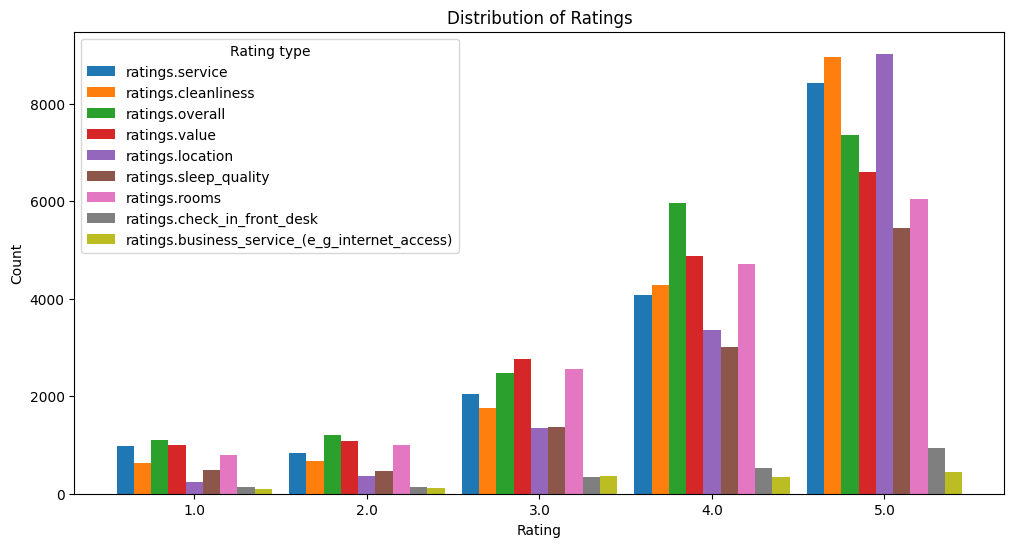

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

rating_counts = pd.DataFrame({
    col: train_df[col].value_counts().sort_index() for col in ratings_columns
})

bar_width = 0.15
group_spacing = 1.5
indices = np.arange(len(rating_counts)) * group_spacing

for i, column in enumerate(rating_counts.columns):
    plt.bar(indices + i * bar_width, rating_counts[column], width=bar_width, label=column)

plt.xticks(indices + bar_width * (len(ratings_columns) - 1) / 2, rating_counts.index)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.legend(title="Rating type")
plt.show()

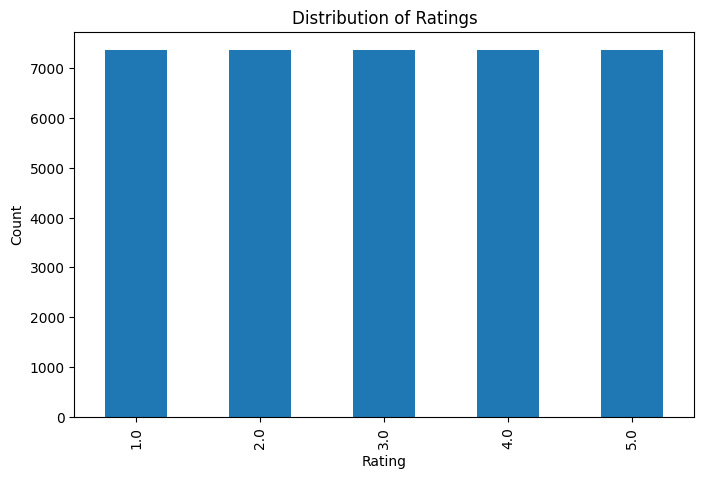

In [19]:
# Balance the training data by oversampling
def balance_data_oversample(df):
    max_count = df['ratings.overall'].value_counts().max()
    balanced_df = pd.DataFrame()

    for rating in df['ratings.overall'].unique():
        rating_df = df[df['ratings.overall'] == rating]
        balanced_df = pd.concat([balanced_df, rating_df.sample(max_count, replace=True)])

    return balanced_df
balanced_train_df = balance_data_oversample(train_df)

# Plot distribution of ratings
balanced_train_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

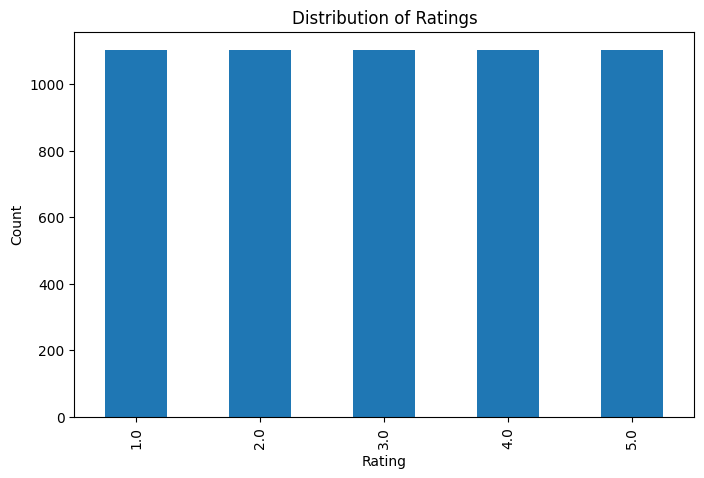

In [20]:
# Balance the training data by undersampling
def balance_data_undersample(df):
    min_count = df['ratings.overall'].value_counts().min()
    balanced_df = pd.DataFrame()

    for rating in df['ratings.overall'].unique():
        rating_df = df[df['ratings.overall'] == rating]
        balanced_df = pd.concat([balanced_df, rating_df.sample(min_count, replace=False)])

    return balanced_df

balanced_train_df = balance_data_undersample(train_df)

# Plot distribution of ratings
balanced_train_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

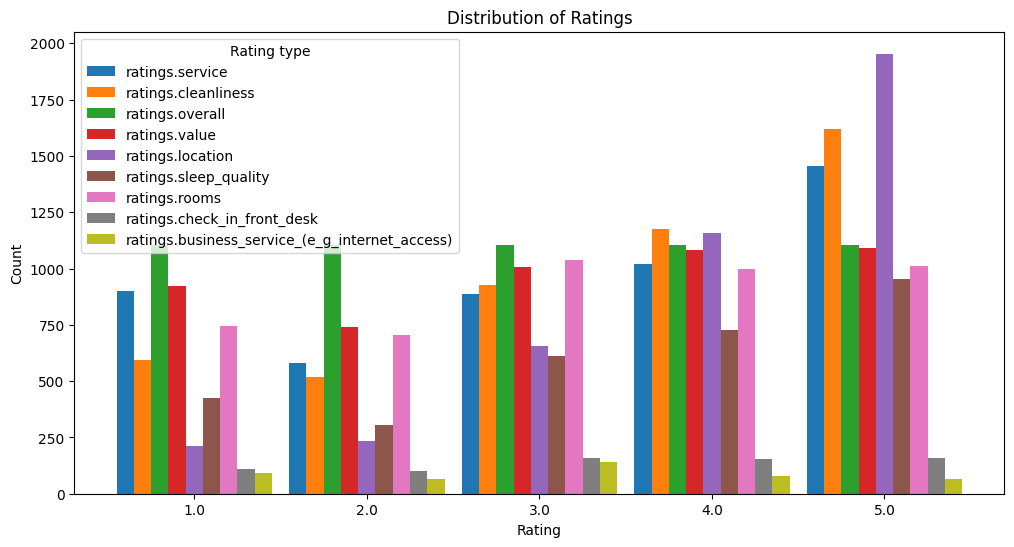

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

rating_counts = pd.DataFrame({
    col: balanced_train_df[col].value_counts().sort_index() for col in ratings_columns
})

bar_width = 0.15
group_spacing = 1.5
indices = np.arange(len(rating_counts)) * group_spacing

for i, column in enumerate(rating_counts.columns):
    plt.bar(indices + i * bar_width, rating_counts[column], width=bar_width, label=column)

plt.xticks(indices + bar_width * (len(ratings_columns) - 1) / 2, rating_counts.index)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.legend(title="Rating type")
plt.show()

In [22]:
balanced_train_df.head()

,title,text,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
3920,decent stay but not the best location,i stayed at the hotel for a week nice bathroom...,3.0,4.0,4.0,3.0,2.0,NaN,4.0,NaN,NaN
17627,nice place to stay,ive stayed here numerous times and never had a...,4.0,5.0,4.0,4.0,4.0,5.0,4.0,NaN,NaN
9551,5star personalized service great location,looks can be deceiving the exterior the rooms...,5.0,5.0,4.0,5.0,NaN,5.0,NaN,NaN,NaN
14048,great place to stay friendly staff,i stayed 3 nights for a business trip i was ve...,4.0,5.0,4.0,4.0,5.0,NaN,4.0,5.0,5.0
4771,fantastic hotelthey have got everything right ...,we found this hotel on expedia and decided to ...,4.0,5.0,4.0,4.0,5.0,5.0,5.0,NaN,NaN


In [23]:
for column in ratings_columns:
    print(f"NA in {column}: {balanced_train_df[column].isna().sum()}")

NA in ratings.service: 671
NA in ratings.cleanliness: 684
NA in ratings.overall: 0
NA in ratings.value: 675
NA in ratings.location: 1297
NA in ratings.sleep_quality: 2492
NA in ratings.rooms: 1012
NA in ratings.check_in_front_desk: 4831
NA in ratings.business_service_(e_g_internet_access): 5073


In [24]:
# Replae the NA review numbers with 0 to indicate they are not used in the review
balanced_train_df = balanced_train_df.fillna(0)
test_df = test_df.fillna(0)

In [25]:
balanced_train_df.head()

,title,text,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
3920,decent stay but not the best location,i stayed at the hotel for a week nice bathroom...,3.0,4.0,4.0,3.0,2.0,0.0,4.0,0.0,0.0
17627,nice place to stay,ive stayed here numerous times and never had a...,4.0,5.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0
9551,5star personalized service great location,looks can be deceiving the exterior the rooms...,5.0,5.0,4.0,5.0,0.0,5.0,0.0,0.0,0.0
14048,great place to stay friendly staff,i stayed 3 nights for a business trip i was ve...,4.0,5.0,4.0,4.0,5.0,0.0,4.0,5.0,5.0
4771,fantastic hotelthey have got everything right ...,we found this hotel on expedia and decided to ...,4.0,5.0,4.0,4.0,5.0,5.0,5.0,0.0,0.0


In [26]:
inputs = balanced_train_df[ratings_columns]
outputs = balanced_train_df['text']

inputs_test = test_df[ratings_columns]
outputs_test = test_df['text']

In [27]:
inputs.head()

,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
3920,3.0,4.0,4.0,3.0,2.0,0.0,4.0,0.0,0.0
17627,4.0,5.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0
9551,5.0,5.0,4.0,5.0,0.0,5.0,0.0,0.0,0.0
14048,4.0,5.0,4.0,4.0,5.0,0.0,4.0,5.0,5.0
4771,4.0,5.0,4.0,4.0,5.0,5.0,5.0,0.0,0.0


In [28]:
outputs.head()

3920     i stayed at the hotel for a week nice bathroom...
17627    ive stayed here numerous times and never had a...
9551     looks can be deceiving the exterior  the rooms...
14048    i stayed 3 nights for a business trip i was ve...
4771     we found this hotel on expedia and decided to ...
Name: text, dtype: object

In [34]:
from math import ceil
average_sequence_length = int(ceil(balanced_train_df['text'].apply(lambda text: text.split(' ')).apply(len).mean()))

## Model

In [35]:
import tensorflow as tf

# Limit GPU memory usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.set_logical_device_configuration(
                gpu,
                [tf.config.LogicalDeviceConfiguration(memory_limit=(6.5 * 1024))])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

2025-05-29 08:19:48.767463: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 08:19:48.778019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748472588.788178   35730 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748472588.791438   35730 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748472588.800098   35730 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1748472592.662165   35730 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6656 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [36]:
import requests
import zipfile

# Store the GloVe files in a directory in this repository
glove_dir = '../glove'
if not os.path.exists(glove_dir):
    os.makedirs(glove_dir)

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = os.path.join(glove_dir, "glove.6B.zip")

if not os.path.exists(glove_zip_path):
    # (Reitz 2016)
    response = requests.get(glove_url, stream=True)
    with open(glove_zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print("Download complete.")

# Extract the GloVe file
if not os.path.exists(os.path.join(glove_dir, "glove.6B.100d.txt")):
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, "r") as zip_ref:
        zip_ref.extractall(glove_dir)
    print("Extraction complete.")

# (Poliak 2020)
embedding_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Found %s word vectors ' % len(embedding_index))

Found 400000 word vectors 


In [37]:
def format_input(rating) -> str:
    input = "Generate a hotel review based on the following ratings:\n"
    service = rating.iloc[0]
    cleanliness = rating.iloc[1]
    overall = rating.iloc[2]
    value = rating.iloc[3]
    location = rating.iloc[4]
    sleep_quality = rating.iloc[5]
    rooms = rating.iloc[6]
    check_in_front_desk = rating.iloc[7]
    business_service = rating.iloc[8]

    if service:
      input += f"- service: {service}\n"
    if cleanliness:
      input += f"- cleanliness: {cleanliness}\n"
    if overall:
      input += f"- overall: {overall}\n"
    if value:
      input += f"- value: {value}\n"
    if location:
      input += f"- location: {location}\n"
    if sleep_quality:
      input += f"- sleep quality: {sleep_quality}\n"
    if rooms:
      input += f"- rooms: {rooms}\n"
    if check_in_front_desk:
      input += f"- check in: {check_in_front_desk}\n"
    if business_service:
      input += f"- business service: {business_service}\n"

    return input

In [38]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, BartForConditionalGeneration
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datasets import Dataset

from math import ceil

dataset = Dataset.from_dict({"ratings": inputs.apply(format_input, axis=1).to_list(), "review_text": outputs.to_list()})

dataset = dataset.shuffle()

# Preprocessing function for dataset
def preprocess(tokeniser, examples):
    model_inputs = tokeniser(examples["ratings"], truncation=True, padding="max_length", max_length=30)
    labels = tokeniser(examples["review_text"], truncation=True, padding="max_length", max_length=ceil(average_sequence_length))
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

# (Poliak 2020)
tokenizer=Tokenizer(oov_token="'oov'")
tokenizer.fit_on_texts(outputs)

max_words = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))

for word, idx in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx]=embedding_vector

maxlen = 200
encoded_text = pad_sequences(tokenizer.texts_to_sequences(outputs), maxlen=maxlen)

In [40]:
model = T5ForConditionalGeneration.from_pretrained('t5-small')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

tokeniser = AutoTokenizer.from_pretrained('t5-small')
tokeniser = AutoTokenizer.from_pretrained('facebook/bart-base')

tokenized = dataset.map(lambda batch: preprocess(tokeniser, batch), batched=True)
training_args = TrainingArguments(output_dir='./results', per_device_train_batch_size=8, num_train_epochs=1)

trainer = Trainer(model=model, args=training_args, train_dataset=tokenized)
trainer.train()

Map:   0%|          | 0/5515 [00:00<?, ? examples/s]

Step,Training Loss
500,3.366800


/home/dev/repos/COMP-SCI-7417-Applied-Natural-Language-Processing/.venv/lib/python3.12/site-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=690, training_loss=3.2715718587239584, metrics={'train_runtime': 227.7971, 'train_samples_per_second': 24.21, 'train_steps_per_second': 3.029, 'total_flos': 98516500992000.0, 'train_loss': 3.2715718587239584, 'epoch': 1.0})

In [41]:
def generate_review(ratings_str):
    device = model.device
    inputs = tokeniser(ratings_str, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_length=average_sequence_length)
    return tokeniser.decode(output[0], skip_special_tokens=True)


test_dataset = Dataset.from_dict({"ratings": inputs_test.apply(format_input, axis=1).to_list(), "review_text": outputs_test.to_list()})

In [42]:
test_dataset = test_dataset.shuffle().select(range(100))  # Select 100 rows
from evaluate import load

from rouge import Rouge
from statistics import mean
rouge = Rouge()

generated_reviews = []
reference_reviews = []

for example in test_dataset:
    generated_review = generate_review(example["ratings"])

    generated_reviews.append(generated_review)
    reference_reviews.append(example["review_text"])

# Evaluate the summaries using the ROUGE metric
rouge_scores = rouge.get_scores(generated_reviews, reference_reviews)
rouge_1_ps = []
rouge_1_rs = []
rouge_1_fs = []

rouge_2_ps = []
rouge_2_rs = []
rouge_2_fs = []

rouge_l_ps = []
rouge_l_rs = []
rouge_l_fs = []
for score in rouge_scores:
    rouge_1_ps.append(score['rouge-1']['p'])
    rouge_1_rs.append(score['rouge-1']['r'])
    rouge_1_fs.append(score['rouge-1']['f'])

    rouge_2_ps.append(score['rouge-2']['p'])
    rouge_2_rs.append(score['rouge-2']['r'])
    rouge_2_fs.append(score['rouge-2']['f'])

    rouge_l_ps.append(score['rouge-l']['p'])
    rouge_l_rs.append(score['rouge-l']['r'])
    rouge_l_fs.append(score['rouge-l']['f'])

print(f"ROUGE-1 Precision: {mean(rouge_1_ps)}")
print(f"ROUGE-1 Recall: {mean(rouge_1_rs)}")
print(f"ROUGE-1 F1: {mean(rouge_1_fs)}")

print(f"ROUGE-2 Precision: {mean(rouge_2_ps)}")
print(f"ROUGE-2 Recall: {mean(rouge_2_rs)}")
print(f"ROUGE-2 F1: {mean(rouge_2_fs)}")

print(f"ROUGE-L Precision: {mean(rouge_l_ps)}")
print(f"ROUGE-L Recall: {mean(rouge_l_rs)}")
print(f"ROUGE-L F1: {mean(rouge_l_fs)}")

from statistics import mean
bertscore = load("bertscore")
results = bertscore.compute(predictions=generated_reviews, references=reference_reviews, lang="en")

precision = mean(results['precision'])
recall = mean(results['recall'])
f1_score = (2 * precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

ROUGE-1 Precision: 0.40030094265961175
ROUGE-1 Recall: 0.22541415816429908
ROUGE-1 F1: 0.2643288908040295
ROUGE-2 Precision: 0.09396107222496847
ROUGE-2 Recall: 0.06006540339259284
ROUGE-2 F1: 0.06466119581728905
ROUGE-L Precision: 0.23806281183451955
ROUGE-L Recall: 0.13834015156100846
ROUGE-L F1: 0.1601006780902516


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8478
Recall:    0.8208
F1 Score:  0.8341


https://github.com/seroetr/LSTM_Text_Generation_using_Tensorflow/blob/main/LSTM%20Text%20Generation%20using%20Tensorflow.ipynb

https://www.digitalocean.com/community/tutorials/automated-metrics-for-evaluating-generated-text

In [ ]:
print(encoded_text)

In [ ]:
X=encoded_text[:,:-1]
y=encoded_text[:,-1]
print("X values")
print(X[:5]) # 5 sample
print("-"*30)
print("X values")
print(y[:5]) # 5 sample

In [ ]:
wc=tokenizer.word_counts
# word frequency
wi=tokenizer.word_index

print(f"Number of unique words and total vocab size: {len(tokenizer.word_counts)+1}")
vocab_size=len(tokenizer.word_counts)+1 # always adding plus one for tensorflow

print("Shape of X",X.shape)
seq_length=X.shape[1]
seq_length

In [ ]:
from sklearn.model_selection import train_test_split

# X still comes from rating features
X = np.repeat(train_df[ratings_columns].fillna(0).values.astype(np.float32), repeats=maxlen, axis=0)

# y is the flattened sequence of token indices
y = encoded_text.flatten()

# Filter out padded values (0s)
valid_indices = y > 0
X = X[valid_indices]
y = y[valid_indices]


# # Prepare input features from ratings
# X = train_df[ratings_columns].values.astype(np.float32)

# # Use a meaningful target y — for regression, typically a numerical value
# # But here we’re still using sequences — this implies a **sequence-to-sequence** or classification task
# # Let's simplify to predicting just the next token as a classification (for now)
# y = encoded_text# [:, 0]  # for example, predict the first token only
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

def create_regression_model(input_dim, output_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))  # For classification over vocab
    return model

model = create_regression_model(input_dim=X.shape[1], output_dim=vocab_size)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_val, y_val),
)


In [ ]:
def generate_sequence(model, tokenizer, ratings_input, seq_length=1, num_tokens_to_generate=20):
    result = []

    for _ in range(num_tokens_to_generate):
        # Predict next token using only the ratings input
        preds = model.predict(np.array([ratings_input]), verbose=0)
        print(preds)
        
        # If model outputs a single token
        next_token_id = tf.argmax(preds[0]).numpy()
        next_word = tokenizer.index_word.get(next_token_id, '')
        result.append(next_word)

    return ' '.join(result)


In [ ]:
sample_ratings = test_df[ratings_columns].iloc[100].values.astype(np.float32)

generated_text = generate_sequence(model, tokenizer, [5,5,4,4,3,3,2,2,1], num_tokens_to_generate=20)
print(generated_text)